In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from IPython.display import Image

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# The Finite Square Well in $\mathbb R:$

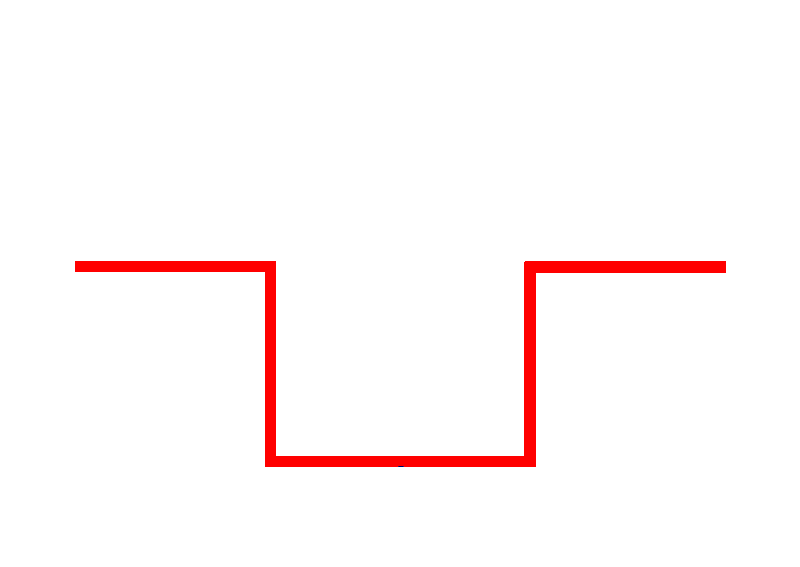

In [3]:
from IPython.display import Image
Image(filename = r'..\Images\square_well.png', width = 1000, height = 1000)

The Hamiltonian $$H=-\frac{\hbar^2}{2m_e}\frac{\partial^2}{\partial x^2}+V(x)$$ can be first used to write the Schrödinger Equation $H\psi(x)=\epsilon\psi(x)$ as $$\Bigg[-\frac{\hbar^2}{2m_e}\frac{\partial^2}{\partial x^2}+V(x)\Bigg]\psi(x)=\epsilon\psi(x)$$ which can be rewritten as $$\Bigg[-\frac{\partial^2}{\partial x^2}+\frac{2m_ea^2}{\hbar^2}V(x')\Bigg]\psi(x')=\frac{2ma^2}{\hbar^2}\epsilon\psi(x')$$ where a characteristic $x'=x/a$ and $a$ is the half-width of the well.

This is done so the well now extends from -1 to 1 instead of $-a$ to $a$. We can then define $$V'=\frac{2ma^2}{\hbar^2}V$$ $$\epsilon'=\frac{2ma^2}{\hbar^2}\epsilon$$ as the characteristic potential and energy to make the problem easier for computation: $$\bigg(-\frac{\partial^2}{\partial x^2}+V'\bigg)\psi(x')=\epsilon'\psi(x')$$

We defined $V'$ in terms of $V$ and now we have $$V_0=-V_0'\frac{\hbar^2}{2m_ea^2}$$ inside the well, where the dimensionless quantity $V_0'$ tells us how many $\hbar^2/2m_ea^2$ there are in $V_0$. 

In summary:

1. Determine $V'$ inside the well using $V_0'=-V_0\bigg(\dfrac{\hbar^2}{2m_ea^2}\bigg)^{-1}$.
2. Solve the eigenenergy equation above for dimensionless energies $\epsilon';$ the energies are $\epsilon=\dfrac{\hbar^2}{2m_ea^2}\epsilon'$.
3. The obtained eigenfunctions $\psi(x')$ where a dimensionless $x'=x/a$, can be used to find the eigenfunctions using the scale transformation $\psi(ax')=\psi(x)$.

We now drop the primes for the sake of readability and convinience, and only consider bound energies where $\epsilon\in(-V_0,0)$. As such, for example, $\sqrt{-\epsilon}$ is real. We have $$\mathrm{Inside}:\hspace{15pt}\bigg(-\dfrac{\partial^2}{\partial x^2}-V_0\bigg)\psi(x)=\epsilon\psi\implies\dfrac{\partial^2\psi}{\partial x^2}=-k^2\psi(x)\hspace{15pt}\mathrm{where}\hspace{15pt}k=\sqrt{\epsilon+V_0}$$ $$\mathrm{Outside}:\hspace{15pt}\bigg(-\dfrac{\partial^2}{\partial x^2}\bigg)\psi(x)=\epsilon\psi\implies\dfrac{\partial^2\psi}{\partial x^2}=l^2\psi(x)\hspace{15pt}\mathrm{where}\hspace{15pt}l=\sqrt{-\epsilon}$$ Since $H$ is symmetric in $x$, the solutions are either even or odd functions. The solutions are thus $$\psi_{\mathrm{even}}=\begin{cases}A\exp(lx)&x<-1\\D\cos(kx)&-1\leq x\leq1\\A\exp(-lx)&x>1\end{cases}$$ $$\psi_{\mathrm{odd}}=\begin{cases}A\exp(lx)&x<-1\\C\sin(kx)&-1\leq x\leq1\\A\exp(-lx)&x>1\end{cases}$$

The Boundary Conditions are that $\psi$ and $\dfrac{\partial\psi}{\partial x}$ are continuous at the boundaries $\pm1$:

- Even: $D\cos(k)=A\exp(-l)$ and $-kD\sin(k)=-lA\exp(-l)$, which yield $k\tan(k)=l$ and thus,$$\sqrt{\epsilon+V_0}\tan(\sqrt{\epsilon+V_0})=\sqrt{-\epsilon}$$
- Odd: $C\sin(k)=A\exp(-l)$ and $kC\cos(k)=-lA\exp(-l)$, which yield $k\cot(k)=-l$ and thus,$$-\sqrt{\epsilon+V_0}\cot(\sqrt{\epsilon+V_0})=\sqrt{-\epsilon}$$

# Computing the Energies $\epsilon$ Analytically:

We get the $V_0$ values corresponding to bound states $\epsilon\in[-V_0,0]$. Note that $V_0$ set at any value in the code is actually that value multiplied by the factor $\dfrac{\hbar^2}{2m_ea^2}$.

In [34]:
V_0 = 36
epsilon = np.linspace(-V_0, 0, 100000)

The LHSs and RHS of the two aforementioned equations:

In [35]:
RHS = np.sqrt(-epsilon)

LHS_1 = np.sqrt(epsilon + V_0) * np.tan(np.sqrt(epsilon + V_0))
LHS_2 = -np.sqrt(epsilon + V_0) / np.tan(np.sqrt(epsilon + V_0 + 1e-09))

Plotting, where the energies are along $x$ whereas the red curve representing the RHS interacts with the LHSs of the two equations:

Text(0, 0.5, '$\\mathrm{LHS}_i\\,\\mathrm{or}\\,RHS$')

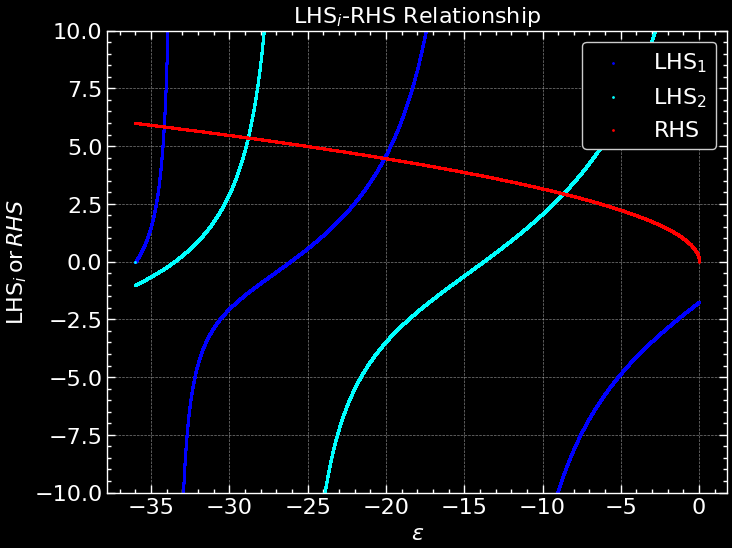

In [36]:
plt.scatter(epsilon, LHS_1, s = 1, color  = 'blue', label = r'$\mathrm{LHS}_1$')
plt.scatter(epsilon, LHS_2, s = 1, color = 'cyan', label = r'$\mathrm{LHS}_2$')
plt.scatter(epsilon, RHS, s = 1, color = 'red', label = r'RHS')

plt.legend(loc = 'upper right')
plt.ylim(-10, 10)

plt.title(r'$\mathrm{LHS}_i$-RHS Relationship')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{LHS}_i\,\mathrm{or}\,RHS$')

We can observe that there are 4 possible 'intersections' or bound energy states in this Finite Square Well. Let's solve for these.

Below, `f1` corresponfs to `RHS-LHS_1` and `f2` corresponfs to `RHS-LHS_2`. The energies making these expressions equal to zero correspond to the intersection points.

In [37]:
def f1(epsilon, V_0):
    return np.sqrt(epsilon + V_0) * np.tan(np.sqrt(epsilon + V_0)) - np.sqrt(-epsilon)

def f2(epsilon, V_0, delta = 1e-10):
    return np.sqrt(epsilon + V_0 + delta) / np.tan(np.sqrt(epsilon + V_0 + delta)) + np.sqrt(-epsilon)

Plotting `f1` and `f2` as functions of energy:

Text(0, 0.5, '$f_i$')

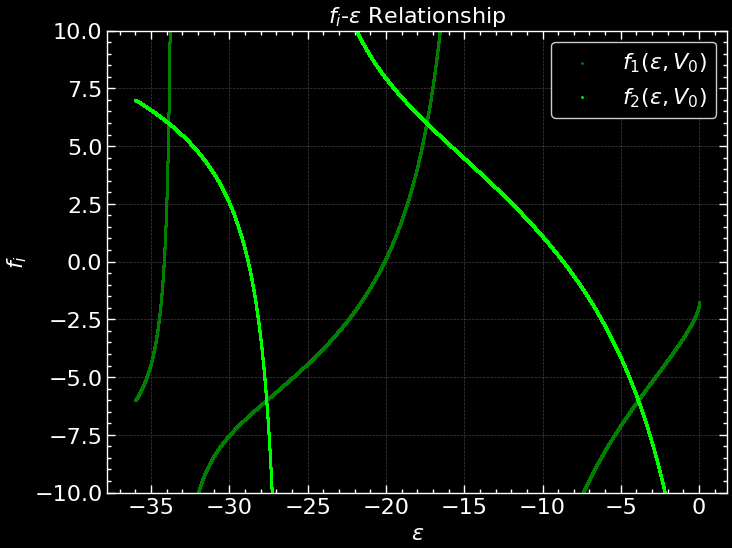

In [38]:
plt.scatter(epsilon, f1(epsilon, V_0), s = 1, color = 'green', label = r'$f_1(\epsilon,V_0)$')
plt.scatter(epsilon, f2(epsilon, V_0), s = 1, color = 'lime', label = r'$f_2(\epsilon,V_0)$')

plt.grid(color = 'grey')
plt.legend(loc = 'upper right')
plt.ylim(-10, 10)

plt.title(r'$f_i$-$\epsilon$ Relationship')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$f_i$')

Now, it's set up for us so that the energies corresponding to the regions where the 'clue curves' above intersect $y=()$ are the bound energies of the system. We just have to 'find $x$ such that some $f(x)=()$', and how this is done on a computer is shown:

In [39]:
f1_values = f1(epsilon, V_0)
f2_values = f2(epsilon, V_0)

zero_crossings_even = np.where(np.diff(np.sign(f1_values)) * (np.abs(f1_values[:-1]) < 3).astype(float))[0]
zero_crossings_odd = np.where(np.diff(np.sign(f2_values)) * (np.abs(f2_values[:-1]) < 3).astype(float))[0]
zero_crossings = np.sort(np.concatenate([zero_crossings_even, zero_crossings_odd]))

epsilon_values_m1 = (epsilon[zero_crossings] + epsilon[zero_crossings + 1]) / 2
epsilon_values_m1

array([-34.19152192, -28.82422824, -20.11322113,  -8.68922689])

The Consecutive Difference is:

In [40]:
np.diff(np.sign(f1_values))

array([0., 0., 0., ..., 0., 0., 0.])

The First Excited State, for example, is $\epsilon'_i=-28.82$. The real energy value is actually $$\epsilon_1=-28.82\frac{\hbar^2}{2m_ea^2}$$

# Solving Numerically:

The equation (primes dropped): $$\Bigg[-\frac{\partial^2}{\partial x^2}+V(x)\Bigg]\psi(x)=\epsilon\psi(x)$$ is an example of an eigenenergy problem over a continuous domain. By discretizing $x$ ($N$ equally spaced values), we can turn this Differential Operator eigenenergy problem into a Matrix Equation eigenenergy problem over an $N$-dimensional vector space.

If $x$ is made discrete, it can only take on values $x_i$ with spacing $\delta x$. The corresponding values a function takes at these $x_i$ values is defined as $f_i\equiv f(x_i)$. In our case, we have $x_i$ and $\psi_i$ values. 

Using the fact that $$\frac{\partial^2\psi}{\partial x^2}(x_i)\approx\frac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{\delta x^2}$$ we can rewrite the Schrödinger Equation as $$\frac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{\delta x^2}+V_i\psi_i=\epsilon_i\psi_i$$ Assuming the wavefunction decays sufficiently fast outside the well, we can assume $\psi_0=\psi_N$ as the Boundary Conditions.

Since this holds $\forall\psi_i$, it can be expressed as a matrix eigenenergy equation. Our Schrödinger Equation $H\psi=\epsilon\psi$ becomes the equation below, where the Hamiltonian $H$ is now a matrix: $$\begin{bmatrix}\dfrac 2{\delta x^2}+V_1&-\dfrac 1{\delta x^2}&0&0\cdots\\-\dfrac 1{\delta x^2}&\dfrac 2{\delta x^2}+V_2&-\dfrac 1{\delta x^2}&0\cdots\\\cdots&\cdots&\cdots&-\dfrac 1{\delta x^2}\\\cdots 0&0&-\dfrac 1{\delta x^2}&\dfrac 2{\delta x^2}+V_{N-1}\end{bmatrix}\begin{bmatrix}\psi_1\\\psi_2\\\psi_3\\\psi_4\\\cdots\\\psi_{N-1}\end{bmatrix}=\epsilon\begin{bmatrix}\psi_1\\\psi_2\\\psi_3\\\psi_4\\\cdots\\\psi_{N-1}\end{bmatrix}$$

We make 100000 $x\in[-3,3]$ values, where the well goes from -1 to 1:

In [41]:
N = 100000

x = np.linspace(-3, 3, N)
dx = np.diff(x)[0]

We also create a main diagonal and off-digonal of the reidiagonal matrix aforementioned:

In [42]:
main_diag = 2 * np.ones(N) / dx ** 2 - V_0 * ((x >= -1) * (x <= 1)).astype(float)
main_diag[0] -= 1 / dx ** 2
main_diag[-1] -= 1 / dx ** 2

off_diag = -np.ones(N - 1) / dx ** 2

We use the `eigh_tridiagonal` SymPy function to solve for the eigenenergies `epsilon_values` and eigenvectors `psi_values` of this matrix, as well as the `select_range` option to only find the eigenenergies in the given range, corresponding to the bound states:

In [43]:
epsilon_values_m2, psi_values = eigh_tridiagonal(main_diag, off_diag, select = 'v', select_range = (-V_0, 0))

Plotting a sample Eigenvector:

Text(0, 0.5, '$|\\psi_i(x)|^2$')

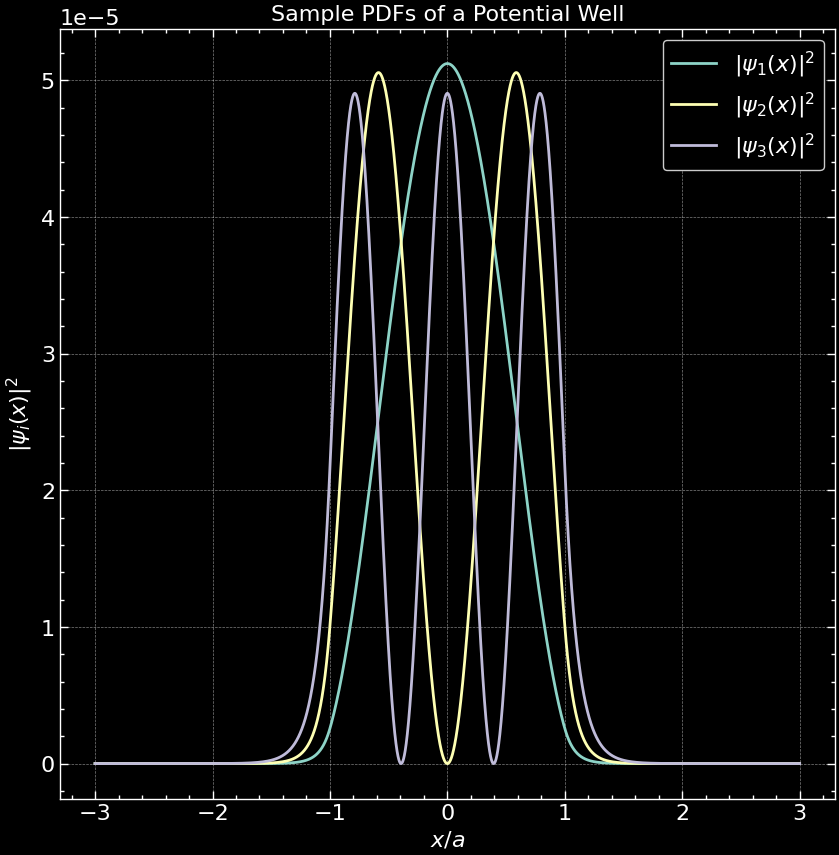

In [44]:
plt.figure(figsize = (10, 10))

plt.plot(x, np.abs(psi_values.T[0]) ** 2, label = r'$|\psi_1(x)|^2$')
plt.plot(x, np.abs(psi_values.T[1]) ** 2, label = r'$|\psi_2(x)|^2$')
plt.plot(x, np.abs(psi_values.T[2]) ** 2, label = r'$|\psi_3(x)|^2$')

plt.legend()
plt.title('Sample PDFs of a Potential Well')
plt.xlabel(r'$x/a$')
plt.ylabel(r'$|\psi_i(x)|^2$')

Comparing the two methods we applied to get the $\epsilon$'s:

In [45]:
epsilon_values_m1

array([-34.19152192, -28.82422824, -20.11322113,  -8.68922689])

In [46]:
epsilon_values_m2

array([-34.19173723, -28.82448397, -20.11396902,  -8.6905795 ])

In [47]:
errs = 100 * np.abs(epsilon_values_m1 - epsilon_values_m2) / (0.5 * (epsilon_values_m1 + epsilon_values_m2))
errs

array([-0.00062972, -0.00088719, -0.00371832, -0.01556524])

The errors appear to increase in orders of magnitude the further energies we calculate.